# KNeighborsClassifier

## Upload dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving fetal_health.csv to fetal_health.csv
User uploaded file "fetal_health.csv" with length 228715 bytes


## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading dataset

In [ ]:
ds=pd.read_csv("fetal_health.csv")
print("Shape of dataset : ",ds.shape)
print("Dataset :-\n",ds.head())

Shape of dataset :  (2126, 22)
Dataset :-
    baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variab

## Count of each class in Target 

In [ ]:
count=ds['fetal_health'].value_counts()
print("Count of each class in Target :-\n",count)

Count of each class in Target :-
 1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


## Assigning X and y values

In [ ]:
X=ds.iloc[:,:-1].values
print("X Shape is : ",X.shape)
print("X is :-\n",X);

X Shape is :  (2126, 21)
X is :-
 [[1.20e+02 0.00e+00 0.00e+00 ... 1.21e+02 7.30e+01 1.00e+00]
 [1.32e+02 6.00e-03 0.00e+00 ... 1.40e+02 1.20e+01 0.00e+00]
 [1.33e+02 3.00e-03 0.00e+00 ... 1.38e+02 1.30e+01 0.00e+00]
 ...
 [1.40e+02 1.00e-03 0.00e+00 ... 1.52e+02 4.00e+00 1.00e+00]
 [1.40e+02 1.00e-03 0.00e+00 ... 1.51e+02 4.00e+00 1.00e+00]
 [1.42e+02 2.00e-03 2.00e-03 ... 1.45e+02 1.00e+00 0.00e+00]]


In [ ]:
y=ds.iloc[:,-1].values
print("y Shape is : ",y.shape)
print("y is :-\n",y)

y Shape is :  (2126,)
y is :-
 [2. 1. 1. ... 2. 2. 1.]


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [ ]:
print("Shape of X_train is : ",X_train.shape)
print("X_train is :-\n",X_train)

Shape of X_train is :  (1488, 21)
X_train is :-
 [[1.27e+02 7.00e-03 0.00e+00 ... 1.30e+02 4.50e+01 0.00e+00]
 [1.43e+02 0.00e+00 2.10e-02 ... 1.47e+02 1.00e+00 0.00e+00]
 [1.20e+02 8.00e-03 1.03e-01 ... 1.26e+02 2.50e+01 0.00e+00]
 ...
 [1.33e+02 0.00e+00 1.00e-03 ... 1.32e+02 2.10e+01 1.00e+00]
 [1.30e+02 6.00e-03 0.00e+00 ... 1.37e+02 4.00e+00 0.00e+00]
 [1.31e+02 7.00e-03 4.00e-03 ... 1.43e+02 2.50e+01 0.00e+00]]


In [ ]:
print("Shape of y_train is : ",y_train.shape)
print("y_train is :-\n",y_train)

Shape of y_train is :  (1488,)
y_train is :-
 [1. 2. 1. ... 1. 1. 1.]


In [ ]:
print("Shape of X_test is : ",X_test.shape)
print("X_test is :-\n",X_test)

Shape of X_test is :  (638, 21)
X_test is :-
 [[1.29e+02 2.00e-03 1.30e-02 ... 1.34e+02 4.00e+00 1.00e+00]
 [1.34e+02 9.00e-03 1.00e-03 ... 1.51e+02 4.20e+01 0.00e+00]
 [1.30e+02 2.00e-03 1.00e-03 ... 1.36e+02 1.50e+01 0.00e+00]
 ...
 [1.37e+02 0.00e+00 4.00e-03 ... 1.39e+02 1.00e+00 0.00e+00]
 [1.27e+02 6.00e-03 0.00e+00 ... 1.29e+02 4.10e+01 0.00e+00]
 [1.25e+02 4.00e-03 1.00e-03 ... 1.19e+02 3.00e+01 0.00e+00]]


In [ ]:
print("Shape of y_test is : ",y_test.shape)
print("y_test is :-\n",y_test)

Shape of y_test is :  (638,)
y_test is :-
 [1. 1. 1. 2. 1. 1. 1. 1. 2. 3. 3. 1. 1. 2. 1. 2. 3. 1. 1. 3. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3. 1.
 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 1. 1. 1.
 2. 1. 2. 1. 3. 3. 2. 2. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3.
 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1.
 2. 1. 1. 1. 1. 3. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 3. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 2. 1. 1. 1.
 1. 2. 2. 1. 1. 1. 1. 1. 1. 2. 1. 3. 1. 1. 1. 1. 1. 2. 1. 2. 1. 3. 1. 1.
 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 3. 1. 1. 2. 1. 2. 1. 2. 1. 2.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 3.
 3. 1. 1. 2. 3. 1. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2.
 2. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 3. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1.
 1. 1. 1

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print("Now X_train is :-\n",X_train)

Now X_train is :-
 [[-0.63437049  0.97001811 -0.19565677 ... -0.58503156  0.90519778
  -0.54442589]
 [ 0.98214376 -0.83035762  0.28240115 ...  0.60852908 -0.6078638
  -0.54442589]
 [-1.34159548  1.22721464  2.14910351 ... -0.86586935  0.21744252
  -0.54442589]
 ...
 [-0.02817765 -0.83035762 -0.17289211 ... -0.44461266  0.07989146
   1.11562683]
 [-0.33127407  0.71282157 -0.19565677 ... -0.09356541 -0.50470051
  -0.54442589]
 [-0.23024193  0.97001811 -0.10459812 ...  0.32769128  0.21744252
  -0.54442589]]


In [ ]:
print("Now X_test is :-\n",X_test)

Now X_test is :-
 [[-0.43230621 -0.31596456  0.10028385 ... -0.30419376 -0.50470051
   1.11562683]
 [ 0.07285449  1.48441117 -0.17289211 ...  0.88936687  0.80203449
  -0.54442589]
 [-0.33127407 -0.31596456 -0.17289211 ... -0.16377486 -0.12643512
  -0.54442589]
 ...
 [ 0.37595092 -0.83035762 -0.10459812 ...  0.04685348 -0.6078638
  -0.54442589]
 [-0.63437049  0.71282157 -0.19565677 ... -0.65524101  0.76764673
  -0.54442589]
 [-0.83643478  0.19842851 -0.17289211 ... -1.3573355   0.38938133
  -0.54442589]]


## Training the KNeighborsClassifier model on the Training set


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print("Predicted vs Actual on Test set")
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Predicted vs Actual on Test set
[[1. 1.]
 [1. 1.]
 [1. 1.]
 ...
 [2. 2.]
 [1. 1.]
 [1. 1.]]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is :-\n",cm)

Confusion Matrix is :-
 [[475  14   3]
 [ 29  58   0]
 [  6   6  47]]


## Graphical Confusion Matrix display

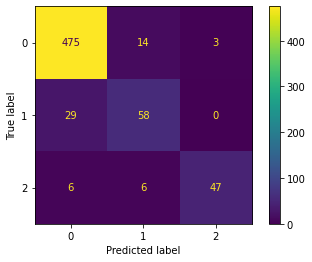

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm).plot()
plt.show()

## Accuracy of the KNeighborsClassifier

In [ ]:
from sklearn.metrics import accuracy_score
#print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Accuracy : ",accuracy_score(classifier.predict(X_test),y_test))

Accuracy :  0.9090909090909091
